In [5]:
import torch
import torch.nn as nn
import pandas as pd
import cv2
import os
from pathlib import Path
import torchvision


In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# import data
img_path = "Dataset/train"
print("Number of cats images" , len(os.listdir(f"{img_path}/cats")) )
print("Number of dogs images" , len(os.listdir(f"{img_path}/dogs")) )

# show some data
for dirpath , dirname , filename in os.walk(img_path):
    print(f"There are {len(dirname)} dir and {len(filename)} images in '{dirpath}' ")

Number of cats images 10000
Number of dogs images 10000
There are 2 dir and 0 images in 'Dataset/train' 
There are 0 dir and 10000 images in 'Dataset/train\cats' 
There are 0 dir and 10000 images in 'Dataset/train\dogs' 


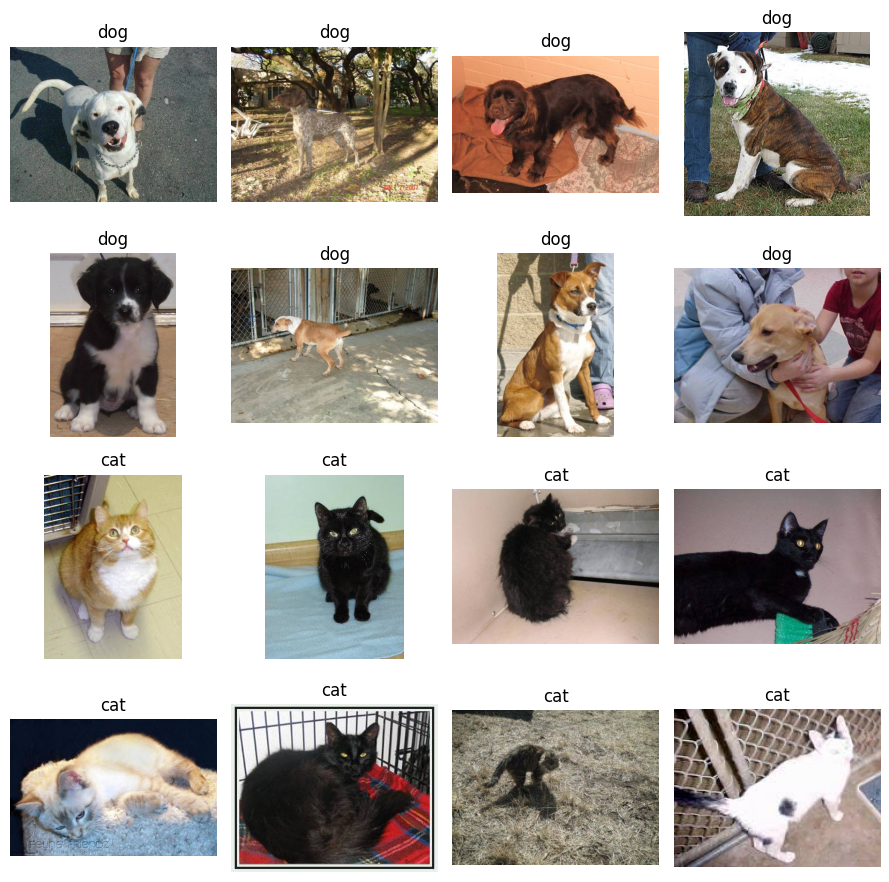

In [7]:
# Visulise some data
import matplotlib.pyplot as plt
import random


fig = plt.figure(figsize= ( 9 , 9))
col  , row = 4 , 4
dog_cls = random.sample(os.listdir(os.path.join(img_path , "dogs")) , k = row*2)
cat_cls = random.sample(os.listdir(os.path.join(img_path , "cats")) , k = row*2)

# combine 
img_cls = dog_cls+ cat_cls
for i in range(0 , row*col):
     
     img = cv2.imread(os.path.join(img_path , img_cls[i].split(".")[0] + "s" , img_cls[i]))
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
     
     plt.subplot(row , col , i+1)
     plt.title(img_cls[i].split(".")[0])
     plt.imshow(img)
     plt.axis(False)
     plt.tight_layout()
     

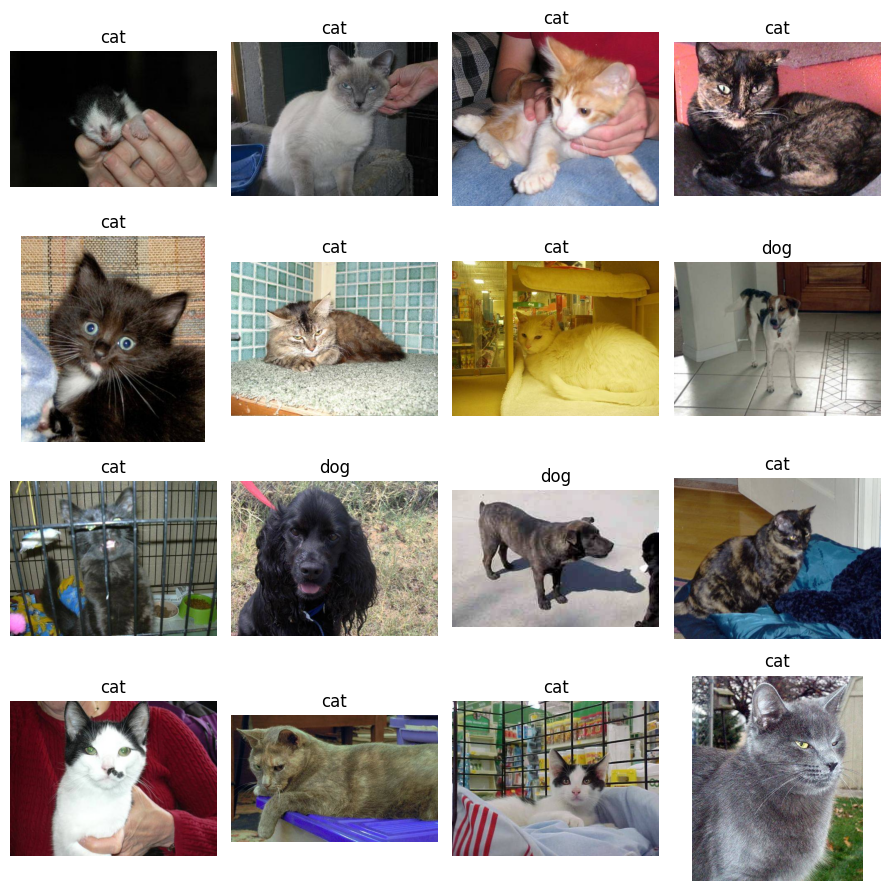

In [8]:
# Visulise some data
import matplotlib.pyplot as plt
import random

random.seed(42)


fig = plt.figure(figsize= ( 9 , 9))
col  , row = 4 , 4
import glob
 
img_cls = random.sample(list(glob.glob(img_path+ "*/*/*.jpg")) , k = row*col)
for i in range(0 , row*col):
     
     img = cv2.imread(img_cls[i])
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
     
     plt.subplot(row , col , i+1)
     plt.title(img_cls[i].split("\\")[3][:3])
     plt.imshow(img)
     plt.axis(False)
     plt.tight_layout()

In [9]:
# Importing the dataset
from torchvision import datasets , transforms
from PIL import Image


In [10]:
# transoform the image
data_transformer = transforms.Compose([
    transforms.Resize(size = (64 , 64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

In [11]:
temp = torch.rand(32 , 3 , 32 , 32)
img = Image.open(img_cls[0])
out = data_transformer(img)

In [12]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

<Figure size 1000x1000 with 0 Axes>

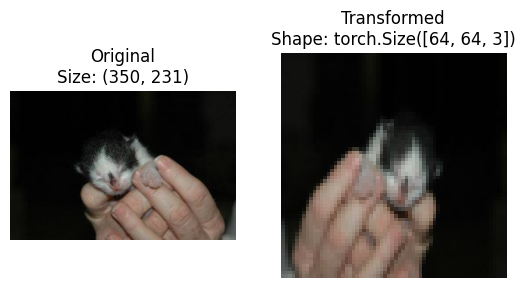

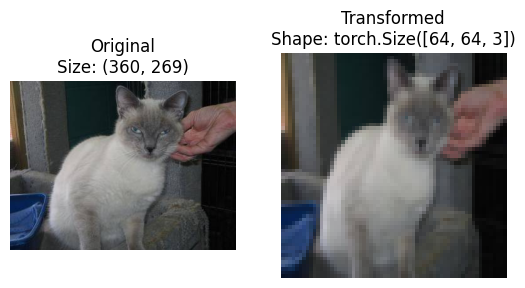

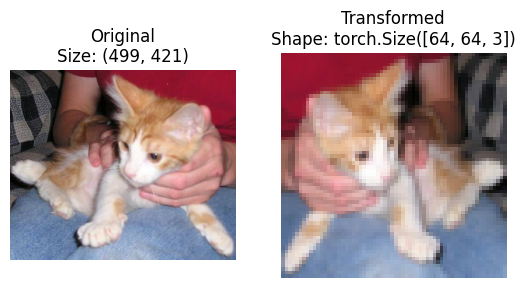

In [15]:
def transform_and_visualise_img(img_path , transform , n = 3):
    random.seed(42)
    fig = plt.figure(figsize=(10 , 10))
    random_path = random.sample(list(glob.glob(img_path+ "*/*/*.jpg")) , k = n)
    for img_ in random_path:
        with Image.open(img_) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")
            
transform_and_visualise_img(img_path= img_path , transform= data_transformer)
    

In [18]:
# Load the data 
from torchvision import datasets
train_data = datasets.ImageFolder(root="Dataset/train" , transform= data_transformer , target_transform= None)


In [19]:
train_data.

Dataset ImageFolder
    Number of datapoints: 20000
    Root location: Dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [28]:
print(f"we have classes {train_data.classes}")
label_class = train_data.class_to_idx
print(train_data.class_to_idx)
print(f"The lengh of the dataset is{len(train_data)}")


we have classes ['cats', 'dogs']
{'cats': 0, 'dogs': 1}
The lengh of the dataset is20000


In [44]:
img , label = train_data[0][0] , train_data[0][1]
img.dtype , label , type(label) , img.shape

(torch.float32, 0, int, torch.Size([3, 64, 64]))

(-0.5, 63.5, 63.5, -0.5)

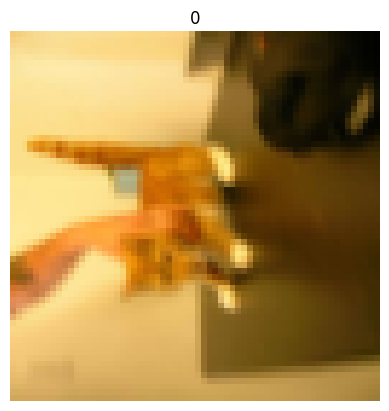

In [52]:
img_new = img.permute(2 , 1 , 0)
plt.imshow(img_new)
plt.title(label)
plt.axis(False)

In [48]:
img.shape

torch.Size([64, 64, 3])